### **UNIVERSIDAD GALILEO**
#### Instituto de Investigación de Operaciones
#### Posgrado en Análisis y Predicción de Datos
##### Luis Florian, 0710082

#### **Hoja de Trabajo # 2**

**Problema 1**

Desarrolle una funcion que permita hacer la binarización de una imagen, para realizarlo puede
utilizar el enfoque que prefiera. Recuerde que al binarizar una imagen esta solo puede contener los
valores 0 (negro) y 255 (blanco).

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

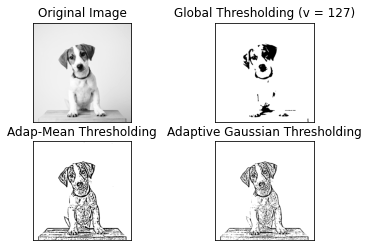

In [3]:
img = cv2.imread('perro.jpg',0)
img = cv2.medianBlur(img,5)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adap-Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
miArray = np.arange(4)
for i in miArray:
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

**Problema 2**

Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA,
AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario
que la imagen estébinarizada. Para realizar las operaciones aritméticas se recomienda seleccionar
imágenes que lo permitan y que sea fácil revisar el resultado.

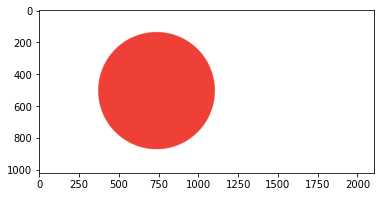

In [28]:
img = cv2.imread('Circulo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

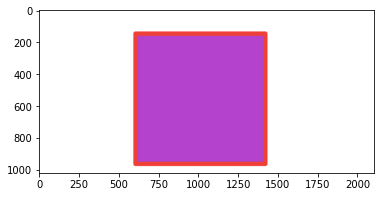

In [31]:
img2 = cv2.imread('cuadrado.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [33]:
img = cv2.imread('Circulo.png',0)
img = cv2.medianBlur(img,5)
ret,imagen1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

img2 = cv2.imread('cuadrado.png',0)
img2 = cv2.medianBlur(img2,5)
ret,imagen2 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)


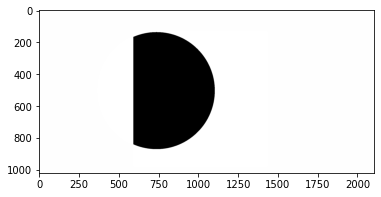

In [35]:
suma = imagen1+imagen2
plt.imshow(suma, 'gray')

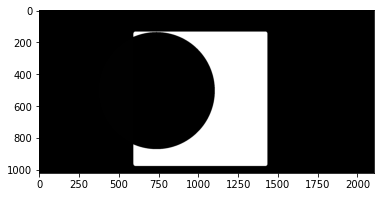

In [37]:
resta = imagen1-imagen2
plt.imshow(resta, 'gray')

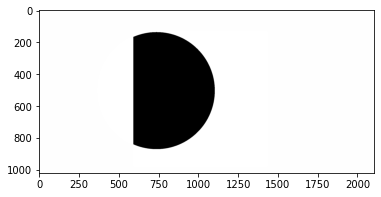

In [38]:
resta2 = imagen2+imagen1
plt.imshow(resta2, 'gray')

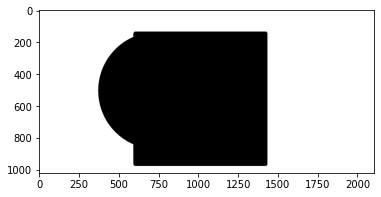

In [42]:
resultado_and = imagen1 & imagen2
plt.imshow(resultado_and, 'gray')

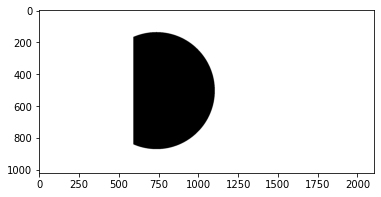

In [44]:
resultado_or = imagen1 | imagen2
plt.imshow(resultado_or, 'gray')

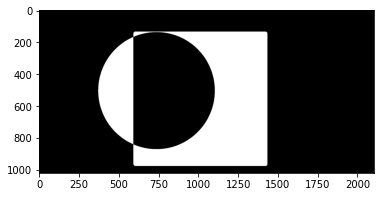

In [47]:
resultado_xor = np.logical_xor(imagen1,imagen2)
plt.imshow(resultado_xor, 'gray')

**Problema 3**

Desarrolle una funci ́on que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel

In [49]:
def plot_intensity(input_image, elev=None, azim=None):
    height = input_image.shape[0]
    width = input_image.shape[1]
    x = np.linspace(0, width, width)
    y = np.linspace(0, height, height)   
    xv, yv = np.meshgrid(x,y)
   
    fig = plt.figure(figsize=[10,8])
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xv, yv, input_image, cmap='gray', linewidth=0)

    ax.view_init(elev,azim)
    ax.set_title("Gráfica de intensidad 3D")
    ax.set_xlabel('Ancho')
    ax.set_ylabel('Altura')
    ax.set_zlabel('Intensidad')
    ax.set_xlim([1,width])
    ax.set_ylim([1,height])
    ax.set_zlim([0,256])
    plt.show()

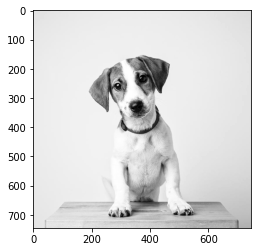

In [52]:
src_image = cv2.imread("perro.jpg", cv2.IMREAD_COLOR)
src_image = cv2.cvtColor(src_image , cv2.COLOR_BGR2GRAY)
plt.imshow(src_image, cmap='gray')
plt.show()

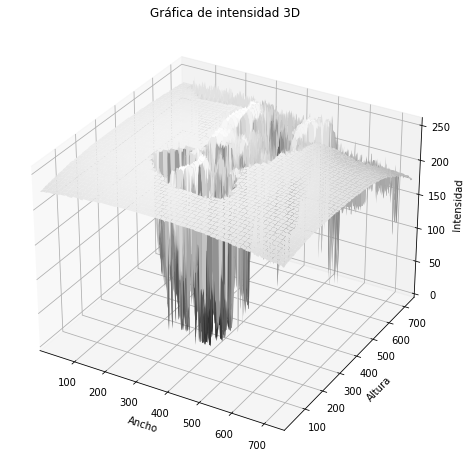

In [53]:
plot_intensity(src_image)

**Problema 4** 

Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial. Puede utilizar la misma funci ́on configurable por medio de parámetros, por ejemplo, si se ingresa 1 en el parámetro de selección se deberá realizar una transformación lineal, si se ingresa 2 se deber ́a realizar una transformación logaritmica y así sucesivamente.

In [54]:
def negative_transform(input_image):
    output_image = 255 - input_image
    return output_image

def lineal_transform(input_image,alpha,beta):
    output_image = (alpha*input_image) + beta
    return output_image

def log_transform(input_image):
    input_image = np.array(input_image, dtype = np.uint16)
    alpha = 255 / np.log(1 + np.max(input_image)) 
    output_image =  alpha * np.log(input_image)
    return np.array(output_image, dtype = np.uint8)

def exp_transform(input_image, alpha, gamma):
    output_image = alpha*(((input_image)/255)**gamma)
    return output_image*255


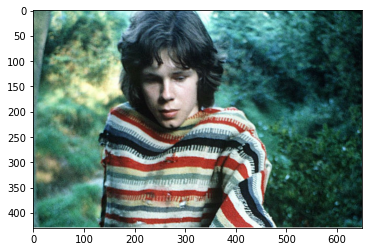

In [56]:
nick = cv2.imread("nick.jpg", cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(nick, cv2.COLOR_BGR2RGB))
plt.show()

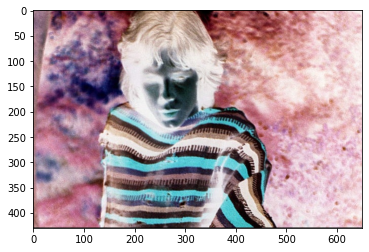

In [57]:
#Negative Transform
output_file = "nick_negative.jpg"
cv2.imwrite(output_file, negative_transform(nick) )
plt.imshow(cv2.cvtColor(cv2.imread(output_file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
plt.show()

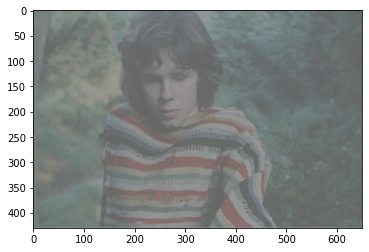

In [59]:
#Lineal
output_file = "nick_lineal.jpg"
cv2.imwrite(output_file, lineal_transform(nick,0.2,100))
plt.imshow(cv2.cvtColor(cv2.imread(output_file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
plt.show()

<ipython-input-54-06e412646214>:12: RuntimeWarning: divide by zero encountered in log
  output_image =  alpha * np.log(input_image)


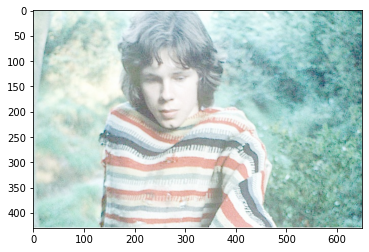

In [61]:
#Aritmética
output_file = "nick_aritmetica.jpg"
cv2.imwrite(output_file, log_transform(nick))
plt.imshow(cv2.cvtColor(cv2.imread(output_file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
plt.show()

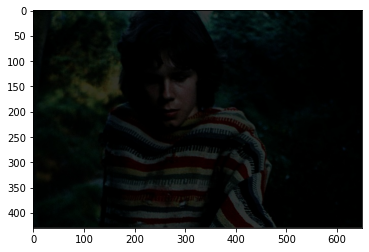

In [62]:
#Exponential
output_file = "nick_exponencial.jpg"
cv2.imwrite(output_file, exp_transform(nick,0.2,3) )
plt.imshow(cv2.cvtColor(cv2.imread(output_file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
plt.show()